<a href="https://colab.research.google.com/github/Jungkihong07/Deepwave/blob/main/show_dataset_and_visualization_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. 필수 라이브러리 설치
!pip install librosa matplotlib seaborn --quiet

In [ ]:
# 2. 라이브러리 임포트
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [ ]:
test_audio_path = '/content/drive/MyDrive/2501ml_data/test'
test_label_path = '/content/drive/MyDrive/2501ml_data/label/test_label.txt'

In [ ]:
with open(test_label_path, 'r') as f:
  lines = f.readlines()

In [ ]:
data = []
for line in lines:
    parts = line.strip().split()
    if len(parts) >= 5:
        speaker_id = parts[0]  # 예: KSI
        filename = parts[1]  # 예: KDF_E_0166.wav
        label = parts[-1]    # 예: Real or Fake
        data.append((filename, label,speaker_id))
df = pd.DataFrame(data, columns=['filename', 'label', 'speaker_id'])
df.head()

,filename,label,speaker_id
0,KDF_E_1004.wav,Real,YSG
1,KDF_E_0510.wav,Real,YSG
2,KDF_E_1538.wav,Real,YSG
3,KDF_E_0370.wav,Real,YSG
4,KDF_E_1048.wav,Real,YSG


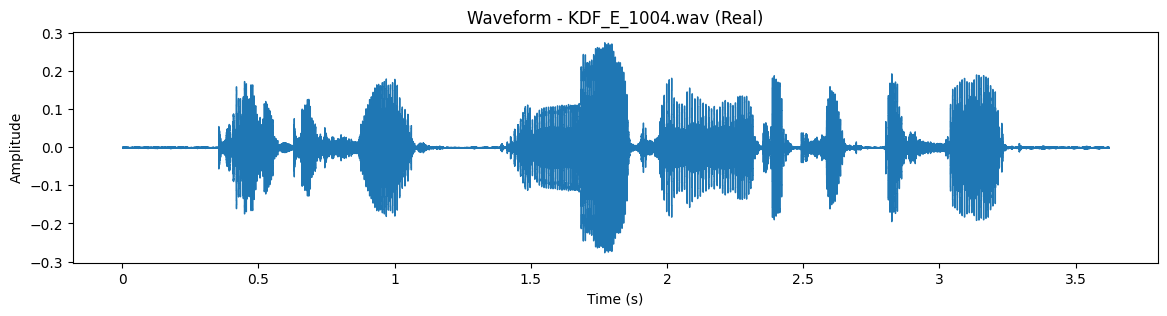

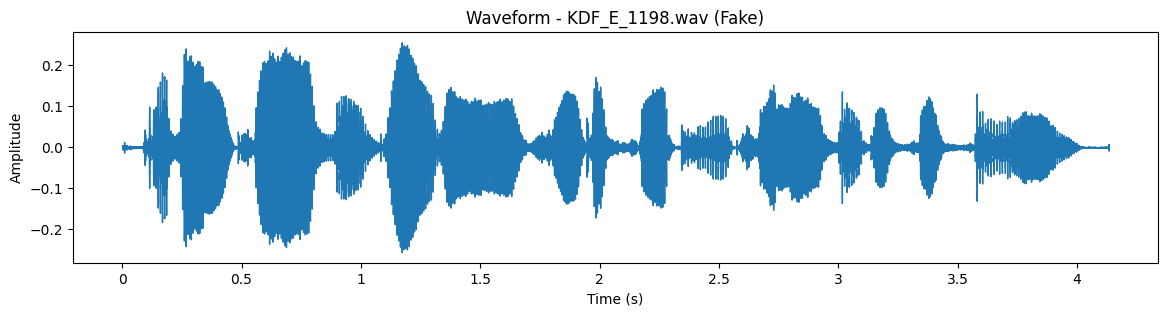

In [ ]:
# Real 샘플 중 하나 선택
real_sample = df[df['label'] == "Real"].iloc[0]
real_filename = real_sample['filename']
real_file_path = os.path.join(test_audio_path, real_filename)

# Fake 샘플 중 하나 선택
fake_sample = df[df['label'] == "Fake"].iloc[0]
fake_filename = fake_sample['filename']
fake_file_path = os.path.join(test_audio_path, fake_filename)

# 오디오 로드
y, sr = librosa.load(real_file_path, sr=16000)
y_fake, sr_fake = librosa.load(fake_file_path, sr=16000)

# Plot: Waveform
plt.figure(figsize=(14, 3))
librosa.display.waveshow(y, sr=sr)
plt.title(f"Waveform - {real_filename} ({real_sample['label']})")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()# 🔹 시각화할 오디오 샘플 선택 (데이터프레임의 첫 번째 샘플)

# Plot: Waveform
plt.figure(figsize=(14, 3))
librosa.display.waveshow(y_fake, sr=sr_fake)
plt.title(f"Waveform - {fake_filename} ({fake_sample['label']})")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()# 🔹 시각화할 오디오 샘플 선택 (데이터프레임의 첫 번째 샘플)


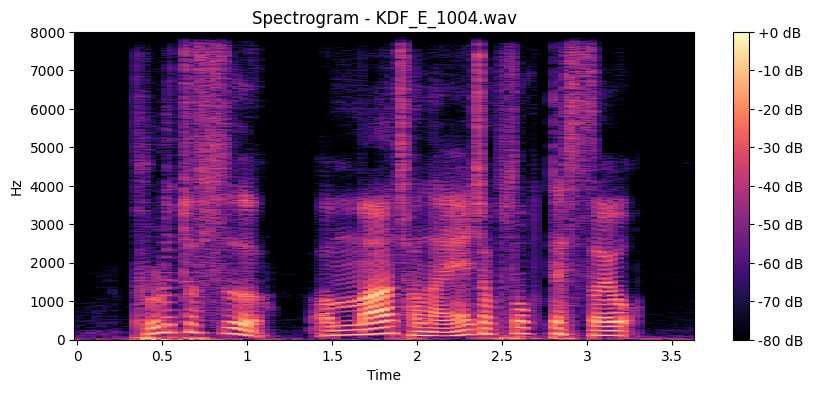

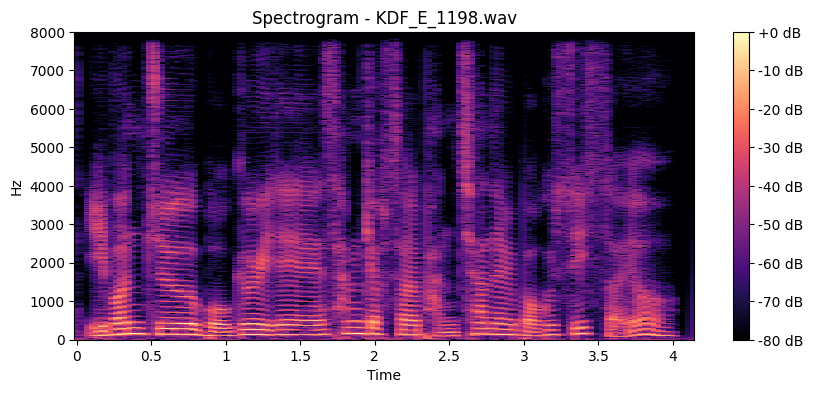

In [ ]:
# Real 샘플 중 하나 선택
real_sample = df[df['label'] == "Real"].iloc[0]
real_filename = real_sample['filename']
real_file_path = os.path.join(test_audio_path, real_filename)

# Fake 샘플 중 하나 선택
fake_sample = df[df['label'] == "Fake"].iloc[0]
fake_filename = fake_sample['filename']
fake_file_path = os.path.join(test_audio_path, fake_filename)

# 오디오 로드
y, sr = librosa.load(real_file_path, sr=16000)
y_fake, sr_fake = librosa.load(fake_file_path, sr=16000)

# 🔸 2. Spectrogram(스펙트로그램) 시각화
plt.figure(figsize=(10, 4))  # 그래프 크기 설정
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)  # STFT 후 dB scale로 변환
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='hz')  # 시간-주파수 그래프
plt.colorbar(format="%+2.0f dB")  # 색상바: 데시벨 값
plt.title(f"Spectrogram - {real_filename} ({real_sample['label']})")  # 그래프 제목
plt.show()

# 🔸 2. Spectrogram(스펙트로그램) 시각화
plt.figure(figsize=(10, 4))  # 그래프 크기 설정
D = librosa.amplitude_to_db(np.abs(librosa.stft(y_fake)), ref=np.max)  # STFT 후 dB scale로 변환
librosa.display.specshow(D, sr=sr_fake, x_axis='time', y_axis='hz')  # 시간-주파수 그래프
plt.colorbar(format="%+2.0f dB")  # 색상바: 데시벨 값
plt.title(f"Spectrogram - {fake_filename}  ({fake_sample['label']})")  # 그래프 제목
plt.show()

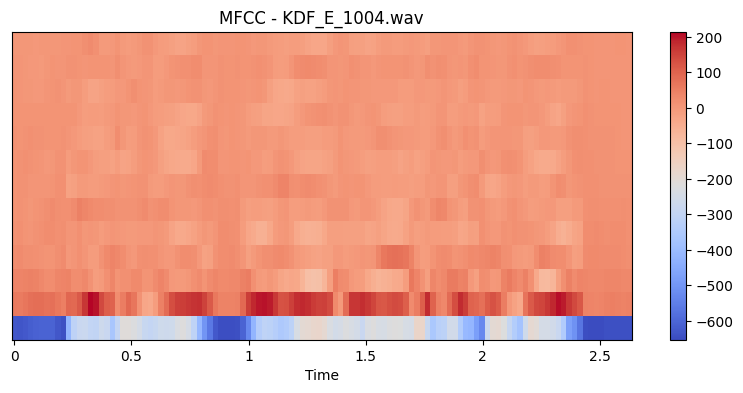

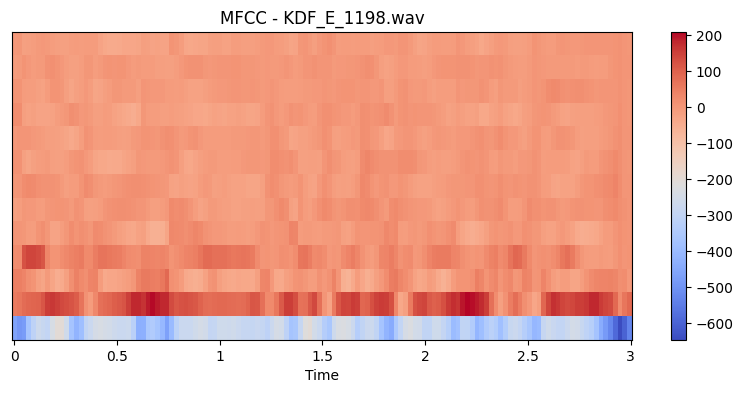

In [ ]:
# Real 샘플 중 하나 선택
real_sample = df[df['label'] == "Real"].iloc[0]
real_filename = real_sample['filename']
real_file_path = os.path.join(test_audio_path, real_filename)

# Fake 샘플 중 하나 선택
fake_sample = df[df['label'] == "Fake"].iloc[0]
fake_filename = fake_sample['filename']
fake_file_path = os.path.join(test_audio_path, fake_filename)

# 오디오 로드
y, sr = librosa.load(real_file_path, sr=16000)
y_fake, sr_fake = librosa.load(fake_file_path, sr=16000)


# 🔸 3. MFCC(Mel Frequency Cepstral Coefficients) 시각화
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)  # MFCC 13차원 특징 추출
plt.figure(figsize=(10, 4))  # 그래프 크기 설정
librosa.display.specshow(mfccs, x_axis='time')  # 시간-계수 그래프
plt.colorbar()  # 색상바: 계수 값
plt.title(f"MFCC - {real_filename}")  # 그래프 제목
plt.show()

# 🔸 3. MFCC(Mel Frequency Cepstral Coefficients) 시각화
mfccs = librosa.feature.mfcc(y=y_fake, sr=sr_fake, n_mfcc=13)  # MFCC 13차원 특징 추출
plt.figure(figsize=(10, 4))  # 그래프 크기 설정
librosa.display.specshow(mfccs, x_axis='time')  # 시간-계수 그래프
plt.colorbar()  # 색상바: 계수 값
plt.title(f"MFCC - {fake_filename}")  # 그래프 제목
plt.show()

### Specail contrast
: 해당 특징은 주파수 내 명암 차이를 확인하는 방법이다.
자세히 말하면 각 주파수 대역의 노이즈 간 차이를 확인하는 것이다. 이를 활용하여 합성 음성의 부자연스러운 에너지 분포를 포착하는 것을 기대하고 있다.
- 1차 시도, MFCC 데이터와 Special_contrast 데이터를 서로 합쳐셔 구성하는 걸 목표로 함. 그러나 결과는 Fake와 Real이 합쳐져서 결과가 좋지 않았음.

In [ ]:
# MFCC에 special Contrast 파일을 임베딩하여 추가로
def extract_features_combined(y, sr=16000, n_mfcc=20):
    # MFCC 및 파생
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    delta_mfcc = librosa.feature.delta(mfcc)
    delta2_mfcc = librosa.feature.delta(mfcc, order=2)

    # Spectral Contrast
    spec_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)

    # 전체 결합 (시간 축 맞춰야 하므로 시간 축 최소 길이로 자르기)
    min_len = min(mfcc.shape[1], delta_mfcc.shape[1], delta2_mfcc.shape[1], spec_contrast.shape[1])
    combined = np.vstack([
        mfcc[:, :min_len],
        delta_mfcc[:, :min_len],
        delta2_mfcc[:, :min_len],
        spec_contrast[:, :min_len]
    ])

    return combined.T  # shape: (time_steps, feature_dim)

🔍 Feature 추출 중: 100%|██████████| 2000/2000 [00:29<00:00, 68.44it/s]


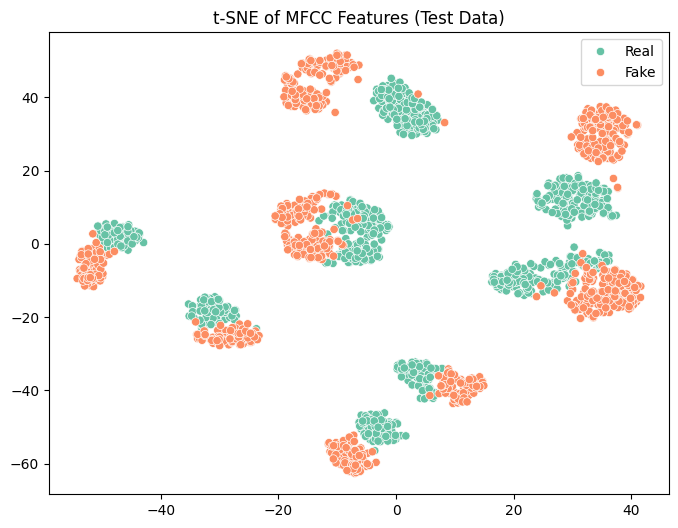

In [ ]:
mfcc_list = []  # 각 음성 샘플의 MFCC 평균 벡터를 저장할 리스트
labels = []     # 각 샘플의 라벨 (0: Real, 1: Fake)

# 🔹 지정된 범위의 오디오 샘플을 순회하며 특징 추출 (Colab 성능 고려해 400개만)
for i in tqdm(range(2000), desc="🔍 Feature 추출 중"):
    filename = df.iloc[i]['filename']          # 파일 이름
    label = df.iloc[i]['label']                # 정답 라벨
    file_path = os.path.join(test_audio_path, filename)  # 오디오 파일 전체 경로

    try:
        # 🔸 오디오 파일 로드 (샘플링 주파수 16kHz)
        y, sr = librosa.load(file_path, sr=16000)

        # 🔸 MFCC 특징 추출 (13차원 계수)
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=30)

        # 🔸 시간 축을 따라 평균을 취해 1D 벡터로 압축 (각 샘플 → (13,) 벡터)
        mfcc_mean = np.mean(mfcc, axis=1)

        # 🔸 결과 저장
        mfcc_list.append(mfcc_mean)
        labels.append(label)
    except Exception as e:
        # 🔸 오류 발생 시 파일 이름과 함께 출력
        print(f"Error processing {filename}: {e}")

# 🔹 차원 축소 전: 표준화 (평균 0, 분산 1로 스케일링)
X = StandardScaler().fit_transform(mfcc_list)

# 🔹 t-SNE 수행 (고차원 특징을 2D로 축소)
# n_components=2: 2차원 출력
# perplexity=30: 이웃 샘플 고려 수
# random_state: 랜덤성 고정
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_embedded = tsne.fit_transform(X)

# 🔹 시각화 (2D t-SNE 결과)
plt.figure(figsize=(8, 6))  # 그래프 크기 설정
sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=labels, palette='Set2' )  # 클래스별 색상 지정
plt.title("t-SNE of MFCC Features (Test Data)")  # 제목 표시
plt.show()

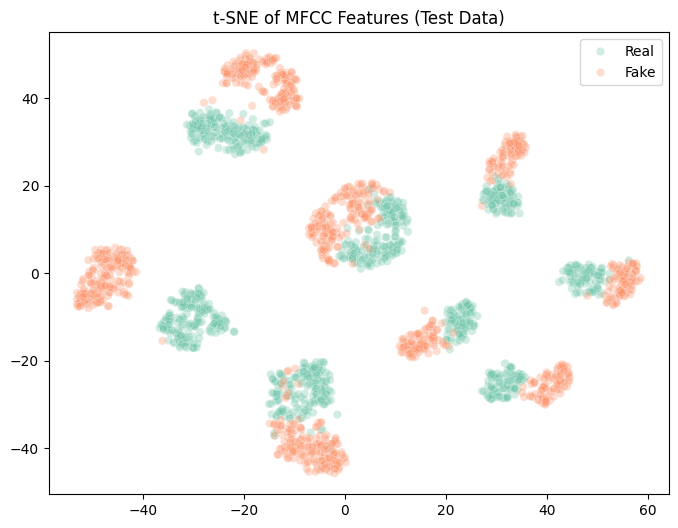

In [ ]:
# 🔹 차원 축소 전: 표준화 (평균 0, 분산 1로 스케일링)
X = StandardScaler().fit_transform(mfcc_list)

# 🔹 t-SNE 수행 (고차원 특징을 2D로 축소)
# n_components=2: 2차원 출력
# perplexity=30: 이웃 샘플 고려 수
# random_state: 랜덤성 고정
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_embedded = tsne.fit_transform(X)

# 🔹 시각화 (2D t-SNE 결과)
plt.figure(figsize=(8, 6))  # 그래프 크기 설정
sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=labels, palette='Set2',alpha=0.3 )  # 클래스별 색상 지정
plt.title("t-SNE of MFCC Features (Test Data)")  # 제목 표시
plt.show()

✅ 해석 결론
Fake 클래스는 고주파 contrast가 낮은 경향이 있음

따라서 contrast 평균 < 25.0이면 Fake일 가능성이 높은 것으로 보임

25.0이라는 기준은 꽤 괜찮은 출발점, 단 binary 결정에는 조금 보수적인 threshold일 수도 있음

✅ 전략적 추천
✔️ 사용할 수 있는 threshold 값 범위
중간 지점: 24.6 ~ 25.0 정도

또는 precision을 높이고 싶으면 threshold = 24.8

recall을 높이고 싶으면 threshold = 24.5

🎧 고주파 contrast 분석 중: 100%|██████████| 2000/2000 [00:17<00:00, 114.82it/s]


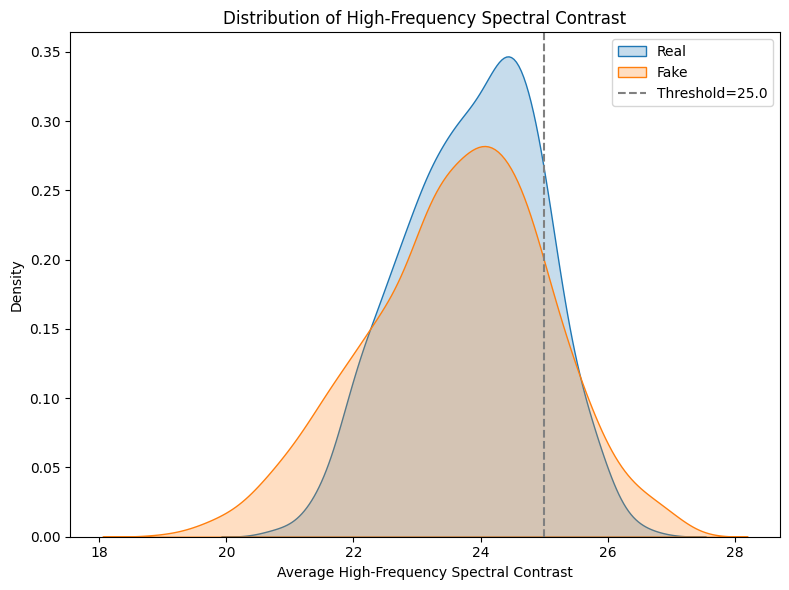

In [ ]:
# 저장용 리스트
real_contrasts = []
fake_contrasts = []

# 전체 중 일부 샘플 (예: 500개)만 분석
sample_size = 2000

for i in tqdm(range(sample_size), desc="🎧 고주파 contrast 분석 중"):
    filename = df.iloc[i]['filename']
    label = df.iloc[i]['label']
    file_path = os.path.join(test_audio_path, filename)

    try:
        y, sr = librosa.load(file_path, sr=16000)
        contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
        high_freq_mean = np.mean(contrast[-2:, :])  # 고주파 2대역 평균

        if label == 'Real':
            real_contrasts.append(high_freq_mean)
        else:
            fake_contrasts.append(high_freq_mean)

    except Exception as e:
        print(f"⚠️ Error: {filename}: {e}")

# 시각화
plt.figure(figsize=(8, 6))
sns.kdeplot(real_contrasts, label="Real", fill=True)
sns.kdeplot(fake_contrasts, label="Fake", fill=True)
plt.axvline(x=25.0, color='gray', linestyle='--', label="Threshold=25.0")
plt.title("Distribution of High-Frequency Spectral Contrast")
plt.xlabel("Average High-Frequency Spectral Contrast")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

🔍 Feature 추출 중: 100%|██████████| 2000/2000 [00:47<00:00, 42.37it/s]


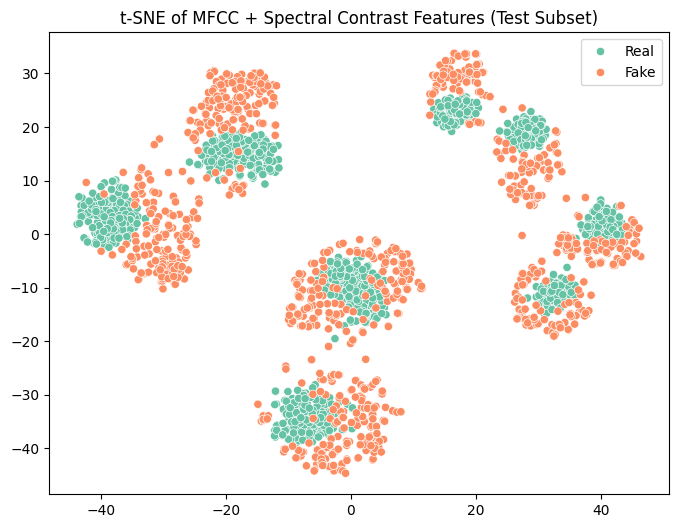

In [ ]:
from tqdm import tqdm
# 리스트 초기화
feature_list = []
labels = []

# 빠르게 400개만 사용 (속도 고려)
sample_size = 2000

for i in tqdm(range(sample_size), desc="🔍 Feature 추출 중"):
    filename = df.iloc[i]['filename']
    label = df.iloc[i]['label']
    file_path = os.path.join(test_audio_path, filename)

    try:
        y, sr = librosa.load(file_path, sr=16000)
        features = extract_features_combined(y, sr=sr)
        feature_mean = np.mean(features, axis=0)  # (feature_dim,)으로 압축
        feature_list.append(feature_mean)
        labels.append(label)
    except Exception as e:
        print(f"⚠️ 오류 발생 - {filename}: {e}")

# 표준화
X = StandardScaler().fit_transform(feature_list)

# t-SNE 적용
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_embedded = tsne.fit_transform(X)

# 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=labels, palette='Set2')
plt.title("t-SNE of MFCC + Spectral Contrast Features (Test Subset)")
plt.show()